In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_immobiliers.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Localisation     638 non-null    object 
 1   Superficie       638 non-null    float64
 2   Chambres         638 non-null    int64  
 3   Type de bien     638 non-null    object 
 4   Prix             638 non-null    float64
 5   Salles de bains  638 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 30.0+ KB


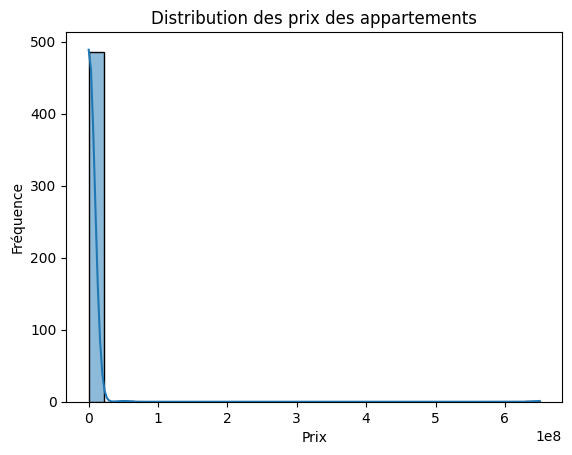

In [4]:
# Filtrer les appartements
appartements = df[df['Type de bien'] == 'Appartement']
sns.histplot(appartements['Prix'], kde=True, bins=30)
plt.title('Distribution des prix des appartements')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

In [12]:
# la distribution des prix est trop affectée par les valeurs aberrantes

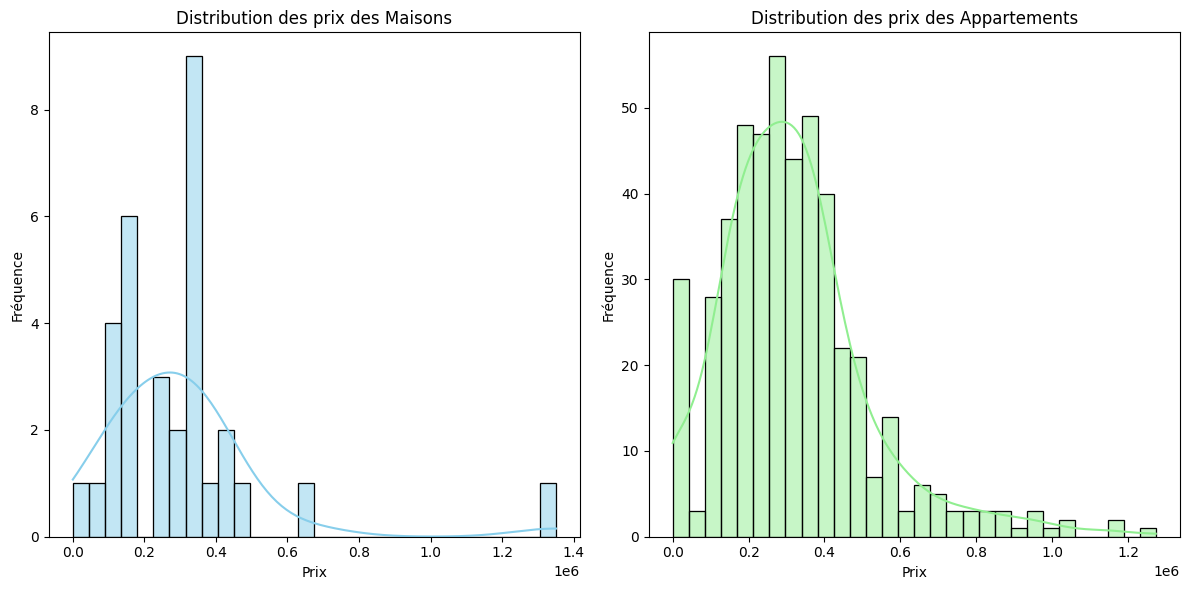

In [17]:
# étude de similarité entre les prix des maisons et des appartemtns
maisons = df[df['Type de bien'] == 'Maison']

q99 = appartements['Prix'].quantile(0.99) # supprimer les ouliers
filtered_appartements = appartements[appartements['Prix'] <= q99]

plt.figure(figsize=(12, 6))

# Plot pour les maisons
plt.subplot(1, 2, 1)
sns.histplot(maisons['Prix'], kde=True, bins=30, color='skyblue')
plt.title('Distribution des prix des Maisons')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

# Plot pour les appartements
plt.subplot(1, 2, 2)
sns.histplot(filtered_appartements['Prix'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution des prix des Appartements')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [13]:
# Fusionner les "appartement" et "maison" dans une seule classe (0) et les "villa" dans la classe (1)
df['Type_de_bien_fusionne'] = df['Type de bien'].apply(lambda x: 0 if x in ['Appartement', 'Maison'] else 1)

In [23]:
houses = df[df['Type_de_bien_fusionne'] == 0]
q99 = houses['Prix'].quantile(0.99) 
filtered_houses = houses[houses['Prix'] <= q99]

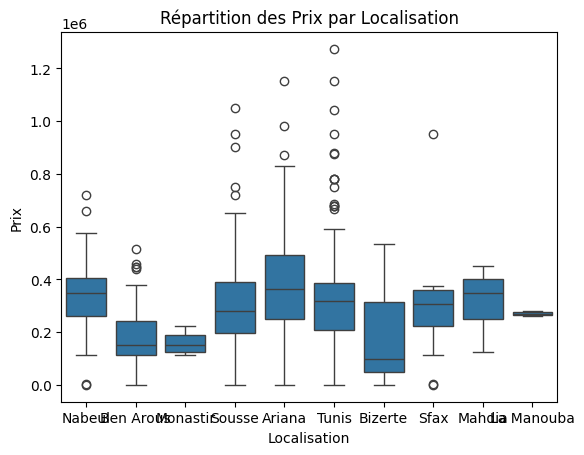

In [24]:
sns.boxplot(x='Localisation', y='Prix', data=filtered_houses)
plt.title('Répartition des Prix par Localisation')
plt.show()

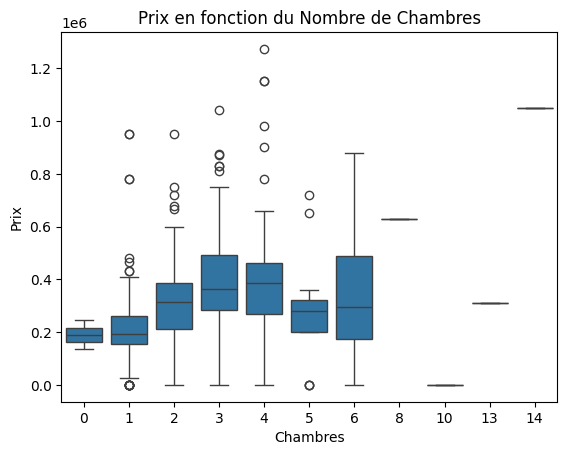

In [25]:
sns.boxplot(x='Chambres', y='Prix', data=filtered_houses)
plt.title('Prix en fonction du Nombre de Chambres')
plt.show()

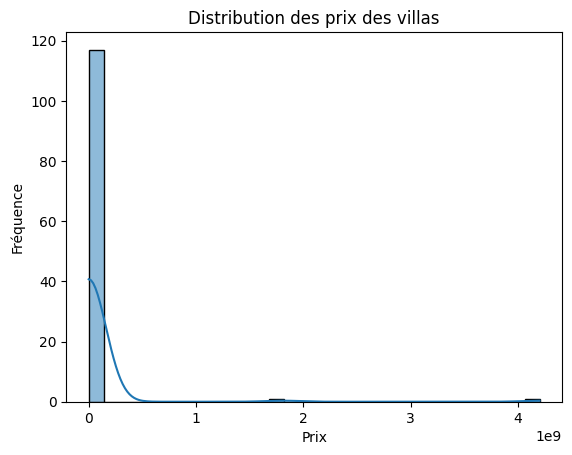

In [8]:
# Filtrer les villas
villas = df[df['Type de bien'] == 'Villa']
sns.histplot(villas['Prix'], kde=True, bins=30)
plt.title('Distribution des prix des villas')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()